<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install ydata_profiling


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)


### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)


Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train.head


<bound method NDFrame.head of                                name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type tran

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

**Ваш ответ здесь.**

In [5]:
print("Skips of missing values:")
print("===Train===")
display(df_train.isna().sum()[df_train.isna().sum() > 0])
print("===Test===")
display(df_test.isna().sum()[df_test.isna().sum() > 0])
print(f'Duplicates in train = {df_train.duplicated().sum()}, test = {df_test.duplicated().sum()}')


Skips of missing values:
===Train===


mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

===Test===


mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

Duplicates in train = 985, test = 62


In [6]:
profile = ProfileReport(df_train, title="Profiling Report", explorative=True)
display(profile.to_notebook_iframe())


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 108401.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

None

>1.1% пропущенных, 10% дубликатов, распределения требуют проеобразований

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [7]:
df_train.dtypes


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [8]:
#категориальные признаки
cat_cols = ["fuel", "seller_type", "transmission", "owner"]


In [9]:
# Ваш код здесь
print("Train statistics:")
display(df_train.describe(include=np.number))
print("Test statistics:")
display(df_test.describe(include=np.number))

print("Train statistics:")
display(df_train[cat_cols].describe())
print("Test statistics:")
display(df_test[cat_cols].describe())


Train statistics:


year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Test statistics:


year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

Train statistics:


fuel seller_type transmission        owner
count     6999        6999         6999         6999
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3793        5826         6095         4587

Test statistics:


fuel seller_type transmission        owner
count     1000        1000         1000         1000
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq       534         837          877          623

In [10]:
print(f'>Train mean   \n{df_train.mean(numeric_only=True)}')
print(f'>Test mean    \n{df_test.mean(numeric_only=True)}')
print(f'>Train median \n{df_train.median(numeric_only=True)}')
print(f'>Test median  \n{df_test.median(numeric_only=True)}')


>Train mean   
year               2013.818403
selling_price    639515.197171
km_driven         69584.615517
seats                 5.419008
dtype: float64
>Test mean    
year               2013.681000
selling_price    617901.042000
km_driven         71393.341000
seats                 5.410805
dtype: float64
>Train median 
year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64
>Test median  
year               2014.0
selling_price    434999.0
km_driven         61500.0
seats                 5.0
dtype: float64


>Распределения тест и трейн очень похожи. имеются незначительные отличия, но в пределах допустимого.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [11]:
# мы предсказываем цену автомобиля, поэтому целевая переменная - price
target = 'selling_price'
cols = [i for i in df_train.columns if i != target]
train_duplicates = df_train.drop(columns=[target]).duplicated()
print(f'Число дубликатов {train_duplicates.sum()}')
display(df_train[train_duplicates])
df_train=df_train.drop_duplicates(subset=cols, keep='first').reset_index(drop=True)


Число дубликатов 1159


name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

> могут быть дубликаты когда один попал в трейн другой в тест(хотя скорее это даталик). 

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [12]:
import re
torque_pattern = re.compile(
    r'(?P<val>[\d\.]+)\s*(?P<unit>Nm|nm)'
    r'(?:\s*@\s*(?P<rpm>[\d\.]+)(?:[-–]\d+)?\s*rpm)?',
    flags=re.IGNORECASE
)
def parse_torque(s: str) -> tuple[float, float]:
    if not isinstance(s, str):
        return np.nan, np.nan

    m = torque_pattern.search(s)
    if not m:
        return np.nan, np.nan

    val = float(m.group("val"))
    unit = m.group("unit").lower()

    rpm = m.group("rpm")
    rpm = float(rpm) if rpm else np.nan

    return val, rpm


In [13]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.extract(r'([\d\.]+)').astype(float)
    df_test[col] = df_test[col].str.extract(r'([\d\.]+)').astype(float)


In [14]:
df_train["torque_nm"], df_train["torque_rpm"] = zip(*df_train["torque"].apply(parse_torque))
df_test["torque_nm"], df_test["torque_rpm"] = zip(*df_test["torque"].apply(parse_torque))
df_train.drop(columns=["torque"], inplace=True)
df_test.drop(columns=["torque"], inplace=True)


In [15]:
df_train.dtypes


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
torque_nm        float64
torque_rpm       float64
dtype: object

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [16]:
median_train = df_train.median(numeric_only=True)

df_train.fillna(median_train, inplace=True)
df_test.fillna(median_train, inplace=True)
display(df_train.isna().sum()[df_train.isna().sum() > 0])
display(df_test.isna().sum()[df_test.isna().sum() > 0])


Series([], dtype: int64)

Series([], dtype: int64)

> лучше медиана т.к. устойчива к выбросам

> фит медианы на трейне, предикт на трейне и тесте.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [17]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)


`Your answer here` > основное кол-во машин имеет либо 2, 4, 6-9, >9 сидений это автобусы. Порядок и расстояние между ними не особо важны, как принадлежность к категории.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [18]:
df_train.describe()


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats    torque_nm   torque_rpm  
count  5840.000000  5840.000000  5840.000000  5840.000000  
mean     87.906371     5.426712   171.242567  2606.634075  
std      31.640418     0.982344    82.267570  1056.078064  
min       0.000000     2.000000    51.000000   175.000000  
25%      68.000000     5.000000   113.000000  1750.000000  
50%      81.860000     5.000000   160.000000  2000.000000  
75%      99.000000     5.000000   200.000000  3500.000000  
max     400.000000    14.000000   789.000000  5000.000000

`Your answer here` > дисперсия уменьшилась, перцентили 25,75 изменились т.к. распределение стало более густым в центре.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1200x1200 with 0 Axes>

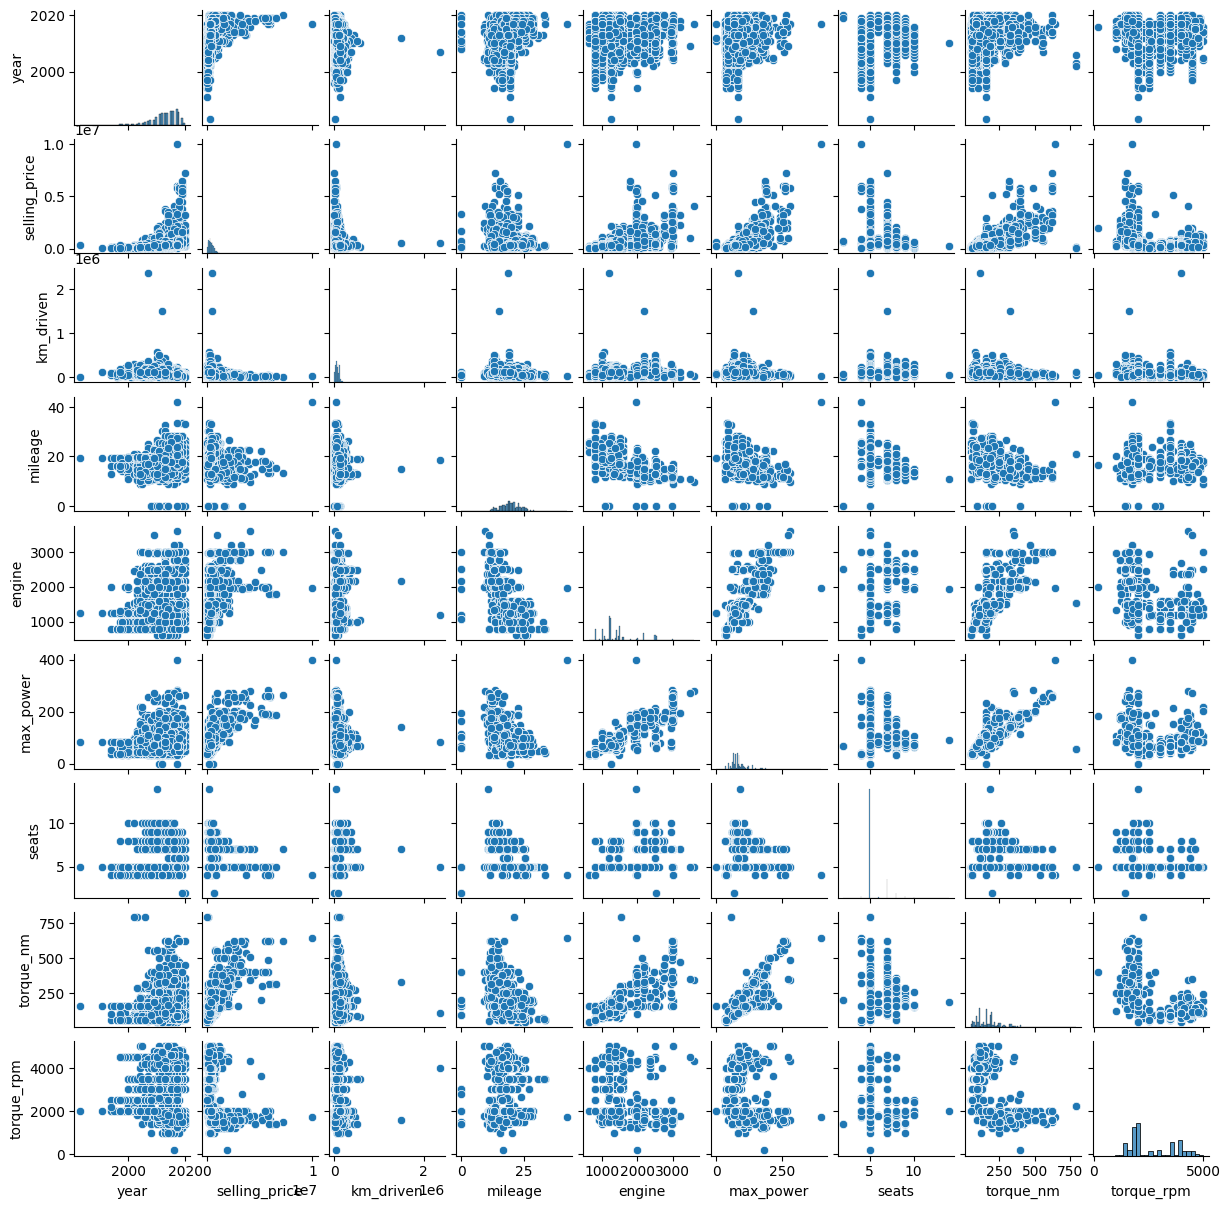

In [19]:
%matplotlib inline
plt.figure(figsize=(12, 12))
g = sns.pairplot(df_train)
g.figure.set_size_inches(12, 12)

plt.show()


>если мы видим облака вдоль какой то линии то можем предполозить линейную корреляцию
например видны корреляции selling price x maxpowr и year

>если облачко / то прямая корреляция, если \ то обратная.

<Figure size 1200x1200 with 0 Axes>

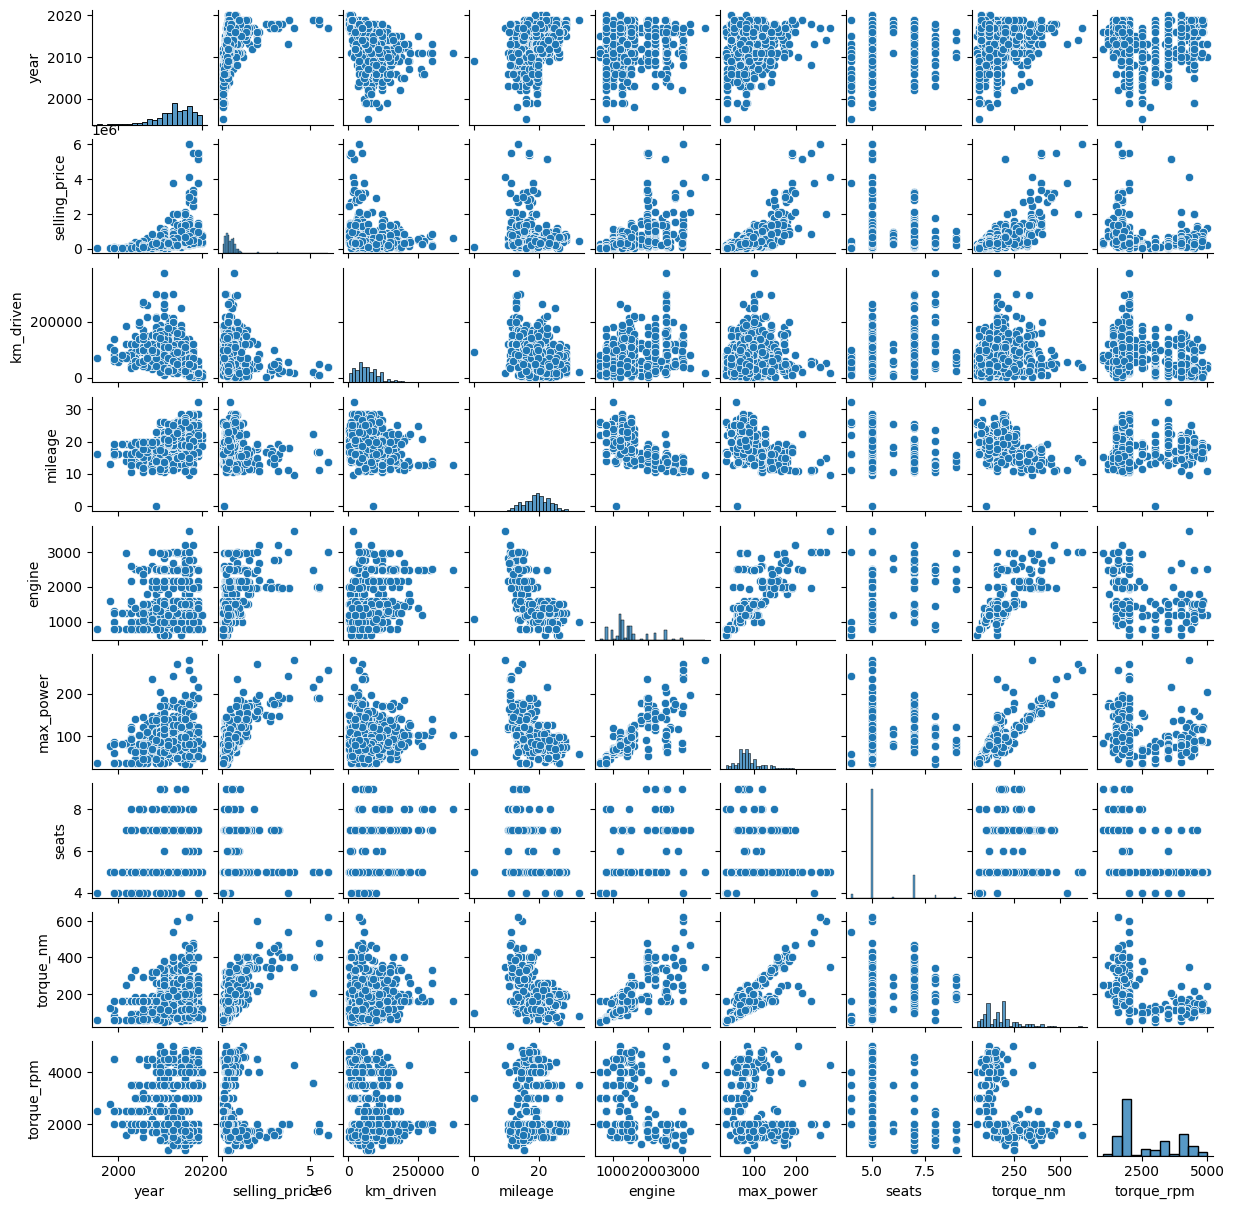

In [20]:
plt.figure(figsize=(12, 12))
g = sns.pairplot(df_test)
g.figure.set_size_inches(12, 12)

plt.show()


### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [21]:
df_train.corr(numeric_only=True)


year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   
torque_nm      0.128780       0.621137   0.122530 -0.241388  0.720599   
torque_rpm     0.077002      -0.219395  -0.251808  0.024070 -0.470332   

               max_power     seats  torque_nm  torque_rpm  
year            0.156858  0.041178   0.128780    0.077002  
selling_price   0.692814  0.149953   0.621137   -0.219395  
km_driven       0.024588  0.192328   0.122530   -0.251808  
mileage        -0.373390 -0.451059  -0.241388    0.024070  
engine          0.681117  0.652172   0.720599   -0.470332  
max_power       1.000000  0.244112   0.818125   -0.269648  
seats           0.244112  1.000000   0.366014   -0.329970  
torque_nm       0.818125  0.366014   1.000000   -0.635491  
torque_rpm     -0.269648 -0.329970  -0.635491    1.000000

<Axes: >

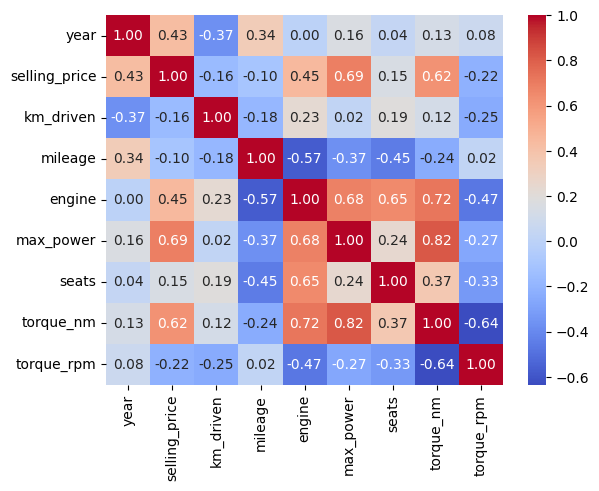

In [22]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

In [23]:
corr = df_train.corr(numeric_only=True)
print(f' abs min columns = {corr.abs().stack().idxmin()}')


 abs min columns = ('year', 'engine')


In [24]:
corr = corr.where(np.triu(corr).astype(bool))
pairs = corr.stack().loc[lambda x: x.abs() > 0.1]
print('Сильная корреляция между признаками:')
print(pairs)


Сильная корреляция между признаками:
year           year             1.000000
               selling_price    0.427279
               km_driven       -0.368966
               mileage          0.341334
               max_power        0.156858
               torque_nm        0.128780
selling_price  selling_price    1.000000
               km_driven       -0.164828
               mileage         -0.104769
               engine           0.447672
               max_power        0.692814
               seats            0.149953
               torque_nm        0.621137
               torque_rpm      -0.219395
km_driven      km_driven        1.000000
               mileage         -0.182086
               engine           0.229766
               seats            0.192328
               torque_nm        0.122530
               torque_rpm      -0.251808
mileage        mileage          1.000000
               engine          -0.572893
               max_power       -0.373390
               seats

`Your answer here` > Да, у year и km_driven достаточно сильная отрицательная корреляция
Мы использовали корреляцию Пирсона

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [25]:
!uv pip install phik


Using Python 3.11.13 environment at: /Users/ep/Documents/Мага/ml/.venv
Audited 1 package in 17ms


In [26]:
# your code here
import numpy as np

def spearman_corr_manual(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    assert len(y) == n

    def rankdata(a):
        order = np.argsort(a)
        ranks = np.empty_like(order, dtype=float)
        ranks[order] = np.arange(1, n + 1)
        return ranks

    rx = rankdata(x)
    ry = rankdata(y)

    d = rx - ry
    num = 6 * np.sum(d**2)
    den = n * (n**2 - 1)
    return 1 - num / den

col1, col2 = 'selling_price', 'max_power'
spearman_manual = spearman_corr_manual(df_train[col1], df_train[col2])
spearman_lib = df_train[[col1, col2]].corr(method='spearman').iloc[0,1]
print(spearman_manual, spearman_lib)


0.6123524312769941 0.6122575511202892


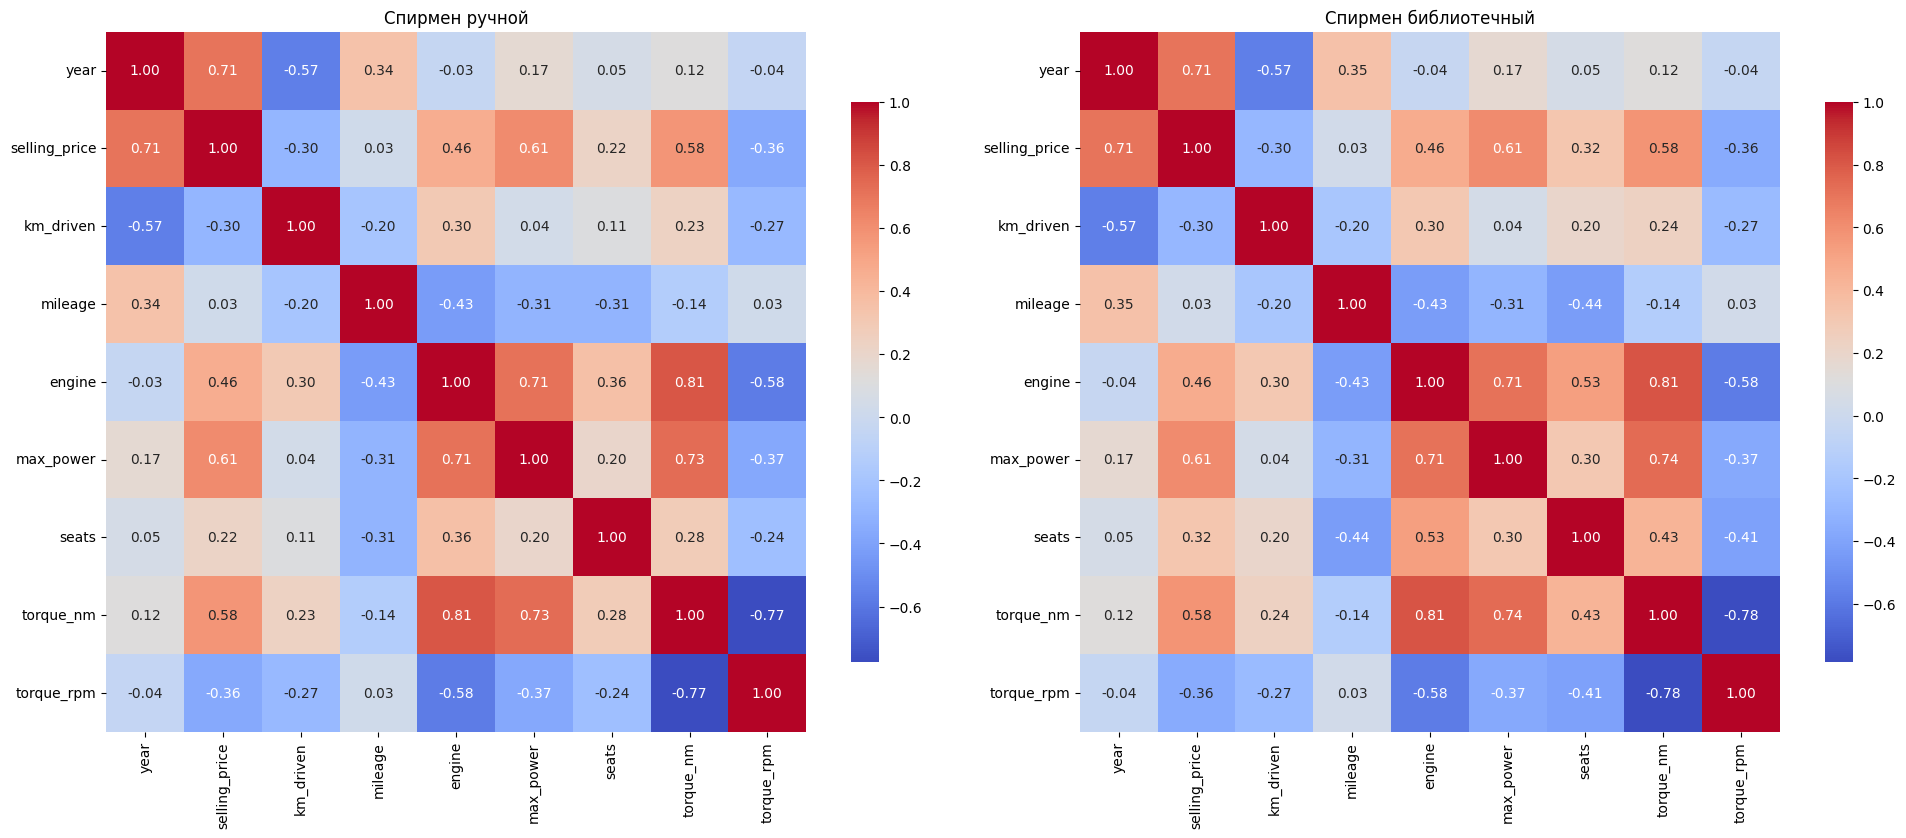

In [27]:
num_cols = df_train.select_dtypes(include=[np.number]).columns
spearman_mat = pd.DataFrame(index=num_cols, columns=num_cols, dtype=float)

for c1 in num_cols:
    for c2 in num_cols:
        spearman_mat.loc[c1, c2] = spearman_corr_manual(df_train[c1], df_train[c2])

corr_spearman = df_train.corr(method="spearman", numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(spearman_mat, ax=axes[0], cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8}, annot=True, fmt=".2f")
axes[0].set_title("Спирмен ручной")

sns.heatmap(corr_spearman, ax=axes[1], cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8}, annot=True, fmt=".2f")
axes[1].set_title("Спирмен библиотечный")

plt.tight_layout()
plt.show()


> Спирмен более чуствителен к моннотонным нелинейным зависимостям. Совпадает с библиотечным, кроме колонки число сидений, вероятно из за того что не реализованы обработка одинаковых рангов в ручном варианте.

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'torque_rpm']


/Users/ep/Documents/Мага/ml/.venv/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


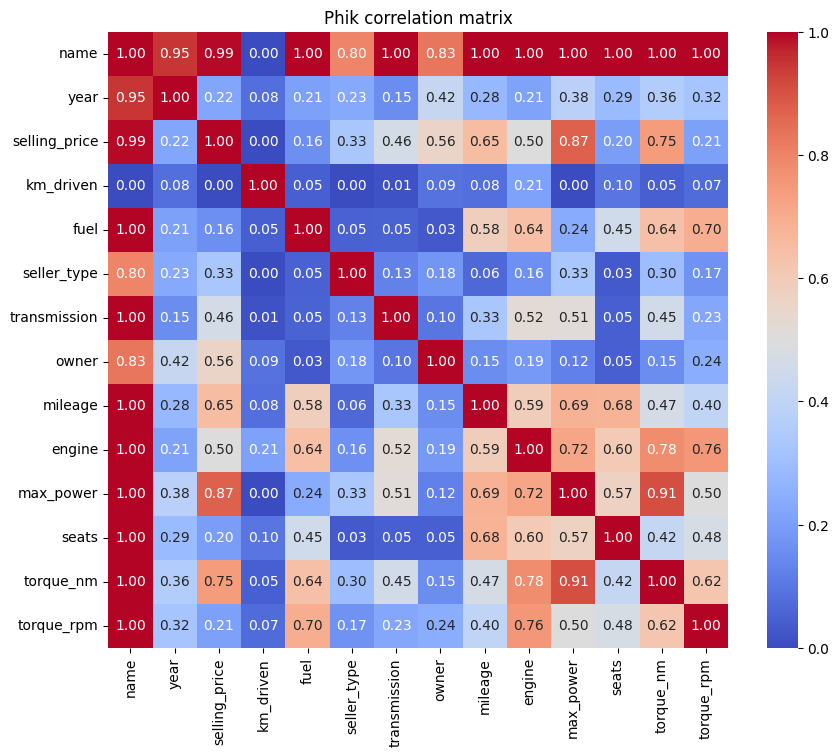

In [28]:
from phik import resources, report
from phik.report import plot_correlation_matrix

phik_matrix = df_train.phik_matrix()

plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Phik correlation matrix")
plt.show()


`Your answer here` В целом phik подтверждает основные выводы из корреляции Пирсона/Спирмена, но при этом лучше подсвечивает ассоциации с категориальными признаками.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [29]:
!uv pip install plotly nbformat -U


Using Python 3.11.13 environment at: /Users/ep/Documents/Мага/ml/.venv
Resolved 14 packages in 247ms                                        
Audited 14 packages in 0.12ms


In [30]:
import plotly.express as px

df = df_train.copy()
df["selling_price_log"] = np.log1p(df["selling_price"])

fig = px.scatter(
    df,
    x="max_power",
    y="selling_price_log",
    trendline="ols",
    opacity=0.45,
    title="Зависимость лог цены от Max Power",
    labels={"max_power": "Max Power", "selling_price_log": "log(1 + price)"}
)

fig.update_layout(height=500, width=800)
fig.show()


# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [31]:
drop_cols = df_train.dtypes[df_train.dtypes == 'object']
print(drop_cols)


name            object
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object


In [32]:
y_train = df_train[target]
X_train = df_train.drop(columns=[target] + drop_cols.index.to_list())


In [33]:
# опишите выбранные вещественные признаки
X_train.describe()


year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.430841  1429.448973    87.906371   
std       4.095622  6.007114e+04     3.985973   485.662834    31.640418   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.370000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats    torque_nm   torque_rpm  
count  5840.000000  5840.000000  5840.000000  
mean      5.426712   171.242567  2606.634075  
std       0.982344    82.267570  1056.078064  
min       2.000000    51.000000   175.000000  
25%       5.000000   113.000000  1750.000000  
50%       5.000000   160.000000  2000.000000  
75%       5.000000   200.000000  3500.000000  
max      14.000000   789.000000  5000.000000

In [34]:
y_test = df_test[target]
X_test = df_test.drop(columns=[target] + drop_cols.index.to_list())



### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"R^2: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {MSE(y_test, y_pred):.2f}")


R^2: 0.601
MSE: 229459486112.45


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$R^2$ = $1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [36]:
def r2_score_manual(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Ошибка модели (Residual Sum of Squares) сумма квадратов разницы между предсказанными и истинными значениями
    ss_res = np.sum((y_true - y_pred) ** 2)

    # Общая вариация таргета (Total Sum of Squares) сумма квадратов разницы между истинными значениями и их средним
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)

    # Защита от случая, когда все y_true одинаковые
    if ss_tot == 0:
        # если модель предсказывает идеально ту же константу
        return 1.0 if ss_res == 0 else 0.0

    return 1 - ss_res / ss_tot


`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [37]:
def adjusted_r2_score_manual(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score_manual(y_true, y_pred)

    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)


`Your answer here` когда надо сравнивать качество при изменении кол-ва признаков т.к. R2 растет при увеличении кол-ва признаков.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f"R^2: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {MSE(y_test, y_pred):.2f}")


R^2: 0.601
MSE: 229459486112.45


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [39]:
print(f'Наиболее влияющий на цену - {X_train.columns[np.abs(lr.coef_).argmax()]}')


Наиболее влияющий на цену - max_power


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f"Lasso R^2: {r2_score(y_test, y_pred_lasso):.3f}")
print(f"Lasso MSE: {MSE(y_test, y_pred_lasso):.2f}")

print(f"Lsso coefs: {lasso.coef_}")


Lasso R^2: 0.601
Lasso MSE: 229460141368.45
Lsso coefs: [162378.28063768 -48561.36266971  -5408.62484228  17135.53259
 261452.10914345 -33502.27724703  92115.14083    -16018.42136588]


> Ничего не занулилось т.к. таргеты ~6*10^5

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {
    "alpha": np.logspace(-5, 5, 100) # соответственно Альфа коэф регуляризации L1, вернее его варианты.
}

grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    return_train_score=True
)

grid.fit(X_train_scaled, y_train)

print("Лучший alpha:", grid.best_params_["alpha"])
print("Лучший R2 по CV:", grid.best_score_)

best_lasso = grid.best_estimator_
print("Число ненулевых весов:", (best_lasso.coef_ != 0).sum())
print("Всего признаков:", best_lasso.coef_.shape[0])


Лучший alpha: 24770.76355991714
Лучший R2 по CV: 0.5867309432512661
Число ненулевых весов: 4
Всего признаков: 8


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
from sklearn.linear_model import ElasticNet

elastic_param_grid = {
    "alpha": np.logspace(-4, 4, 20),
    "l1_ratio": np.linspace(0.1, 0.9, 20),
}

elastic = ElasticNet(max_iter=5000, random_state=42)
elastic_grid = GridSearchCV(
    estimator=elastic,
    param_grid=elastic_param_grid,
    cv=10,
    scoring="r2",
    return_train_score=True,
)

elastic_grid.fit(X_train_scaled, y_train)
print("Лучшие гиперпараметры:", elastic_grid.best_params_)
print(f"Лучший R2 по CV: {elastic_grid.best_score_:.3f}")

best_elastic = elastic_grid.best_estimator_

y_pred_elastic_train = best_elastic.predict(X_train_scaled)
y_pred_elastic_test = best_elastic.predict(X_test_scaled)

print(f"Train R2: {r2_score(y_train, y_pred_elastic_train):.3f}")
print(f"Test R2:  {r2_score(y_test, y_pred_elastic_test):.3f}")
print(f"Train MSE: {MSE(y_train, y_pred_elastic_train):.2f}")
print(f"Test MSE:  {MSE(y_test, y_pred_elastic_test):.2f}")


Лучшие гиперпараметры: {'alpha': np.float64(0.615848211066026), 'l1_ratio': np.float64(0.6894736842105262)}
Лучший R2 по CV: 0.584
Train R2: 0.594
Test R2:  0.570
Train MSE: 116329642934.17
Test MSE:  247405749982.71


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



Train MSE: 387480411482.4502
Test  MSE: 559236689553.0065
R^2 on test: 0.0271
Coefficients: [162380.52302749 -48562.2998432   -5411.58579002  17137.81121838
 261450.78273479 -33506.28018641  92114.7956549  -16020.58490221]


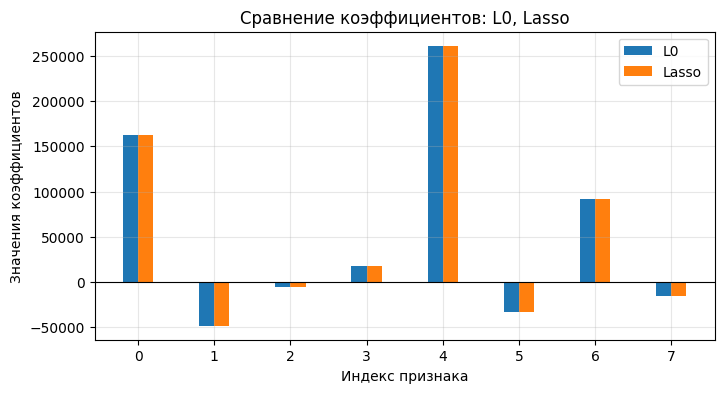

In [43]:
import numpy as np
from scipy.optimize import minimize


class L0LinearRegression:

    def __init__(self, lambda_=1.0, alpha=100.0, max_iter=1000, tol=1e-6, zero_tol=1e-6):
        self.lambda_ = lambda_
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.zero_tol = zero_tol

        self.coef_ = None
        self.n_features_in_ = None
        self.nonzero_mask_ = None

    def _loss(self, w, X, y):
        residuals = y - X @ w
        mse = np.mean(residuals ** 2)

        l0_relax = np.sum(1.0 - np.exp(-self.alpha * np.abs(w)))

        return mse + self.lambda_ * l0_relax

    def fit(self, X, y):
        X = np.asarray(X, float)
        y = np.asarray(y, float).ravel()

        if X.ndim != 2:
            raise ValueError("X долджен быть 2D.")
        if y.ndim != 1:
            raise ValueError("y должен быть 1D.")

        _, n_features = X.shape
        self.n_features_in_ = n_features

        try:
            w0, *_ = np.linalg.lstsq(X, y, rcond=None)
        except:
            w0 = np.zeros(n_features, float)
            print("МНК не сошелся, используем нулевую инициализацию.")

        result = minimize(
            fun=self._loss,
            x0=w0,
            args=(X, y),
            method="L-BFGS-B",
            options={"maxiter": self.max_iter, "ftol": self.tol}
        )

        if not result.success:
            print("Оптимизация не сошлась: " + result.message)

        self.coef_ = result.x.copy()
        self.nonzero_mask_ = np.abs(self.coef_) > self.zero_tol
        return self

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Model must be fitted first.")

        X = np.asarray(X, float)
        return X @ self.coef_

    def score(self, X, y):
        """ R^2 score."""
        y = np.asarray(y, float)
        y_pred = self.predict(X)

        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - ss_res / ss_tot


import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

model_l0 = L0LinearRegression(
    lambda_=1.0,
    alpha=100.0,
    max_iter=2000,
)
model_l0.fit(X_train_scaled, y_train)

y_pred_train = model_l0.predict(X_train_scaled)
y_pred_test = model_l0.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2_test = model_l0.score(X_test_scaled, y_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test  MSE: {test_mse:.4f}")
print(f"R^2 on test: {r2_test:.4f}")
print(f"Coefficients: {model_l0.coef_}")

# Сравнение с Lasso
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
idx = np.arange(X_train.shape[1])

ax.bar(idx - 0.1, model_l0.coef_, width=0.2, label="L0")
ax.bar(idx + 0.1, lasso.coef_, width=0.2, label="Lasso")

ax.axhline(0.0, color="k", linewidth=0.8)
ax.set_xlabel("Индекс признака")
ax.set_ylabel("Значения коэффициентов")
ax.set_title("Сравнение коэффициентов: L0, Lasso")
ax.legend()
ax.grid(alpha=0.3)

plt.show()



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [44]:
def split_name_column(df):
    parts = df['name'].str.split()
    df['brand'] = parts.str[0]
    df['model'] = parts.str[1]
    df['version'] = parts.str[2:].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
    return df.drop(columns=['name'])

df_train_cat = split_name_column(df_train)
df_test_cat = split_name_column(df_test)


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_features = df_train_cat.select_dtypes(include=["object"]).columns.tolist()
cat_features.append("seats")

print("Категориальные признаки:", cat_features)

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

ohe.fit(df_train[cat_features])

train_ohe = ohe.transform(df_train_cat[cat_features])
test_ohe  = ohe.transform(df_test_cat[cat_features])

ohe_columns = ohe.get_feature_names_out(cat_features)

df_train_ohe = pd.DataFrame(train_ohe, columns=ohe_columns, index=df_train.index)
df_test_ohe  = pd.DataFrame(test_ohe,  columns=ohe_columns, index=df_test.index)

df_train_encoded = pd.concat([df_train.drop(columns=cat_features), df_train_ohe], axis=1)
df_test_encoded  = pd.concat([df_test.drop(columns=cat_features),  df_test_ohe], axis=1)



Категориальные признаки: ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model', 'version', 'seats']


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here` fit только на train, удаляем для избежания линейной зависимости

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_param_grid = {
    "alpha": np.logspace(-3, 4, 1000),
}

ridge = Ridge(random_state=42)
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=10,
    scoring="r2",
    return_train_score=True,
)

ridge_grid.fit(X_train_scaled, y_train)
print("Лучшие гиперпараметры:", ridge_grid.best_params_)
print(f"Лучший R2 по CV: {ridge_grid.best_score_:.3f}")

best_ridge = ridge_grid.best_estimator_

y_pred_ridge_train = best_elastic.predict(X_train_scaled)
y_pred_ridge_test = best_elastic.predict(X_test_scaled)

print(f"Train R2: {r2_score(y_train, y_pred_ridge_train):.3f}")
print(f"Test R2:  {r2_score(y_test, y_pred_ridge_test):.3f}")
print(f"Train MSE: {MSE(y_train, y_pred_ridge_train):.2f}")
print(f"Test MSE:  {MSE(y_test, y_pred_ridge_test):.2f}")


Лучшие гиперпараметры: {'alpha': np.float64(1011.5911122238298)}
Лучший R2 по CV: 0.584
Train R2: 0.594
Test R2:  0.570
Train MSE: 116329642934.17
Test MSE:  247405749982.71


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

*Сгенерировать новые признаки на основе уже существующих:*

In [47]:
def add_handcrafted_features(df):
    df = df.copy()
    eps = 1e-6

    df['engine_liters'] = df['engine'] / 1000.0
    df['power_per_liter'] = df['max_power'] / (df['engine_liters'].replace(0, np.nan) + eps)
    df['torque_per_liter'] = df['torque_nm'] / (df['engine_liters'].replace(0, np.nan) + eps)

    ref_year = df['year'].max()
    df['car_age'] = (ref_year - df['year']).clip(lower=0)
    df['km_per_year'] = df['km_driven'] / (df['car_age'].replace(0, np.nan) + eps)

    df['log_km_driven'] = np.log1p(df['km_driven'])
    df['log_max_power'] = np.log1p(df['max_power'].clip(lower=0))

    return df



In [48]:
def enrich_with_external_features(df):
    df = df.copy()

    # флаги по продавцу и коробке
    df['seller_is_dealer'] = df['seller_type'].isin(['Dealer', 'Trustmark Dealer']).astype(int)
    df['is_automatic'] = (df['transmission'] == 'Automatic').astype(int)

    # владельцы 3+ и тестовые авто
    df['owner_3plus'] = df['owner'].str.contains('Third|Fourth|Above|Test Drive', case=False, na=False).astype(int)

    # альтернативное топливо
    df['is_alt_fuel'] = df['fuel'].isin(['CNG', 'LPG', 'Electric']).astype(int)

    # городская машина
    df['city_friendly'] = ((df['is_automatic'] | df['is_alt_fuel']) & (df['engine'] < 1500)).astype(int)

    return df


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [50]:
def business_metrics(y_true, y_pred, tol=0.10):

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    mask = y_true != 0
    rel_err = np.zeros_like(y_true, dtype=float)
    rel_err[mask] = np.abs(y_pred[mask] - y_true[mask]) / np.abs(y_true[mask])

    return np.mean(rel_err <= tol)

business_metrics(y_train, y_pred_ridge_train)


np.float64(0.2386986301369863)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [51]:
def your_business_metrics(y_true, y_pred, tol=0.10, under_penalty=0.6):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    rel_error = (y_pred - y_true) / y_true

    score = np.zeros_like(rel_error, dtype=float)

    # точные прогнозы
    good = np.abs(rel_error) <= tol
    score[good] = 1.0

    # переоценка
    over = rel_error > tol
    score[over] = np.maximum(0.0, 1.0 - rel_error[over])

    # недооценка (штраф сильнее)
    under = rel_error < -tol
    score[under] = np.maximum(0.0, 1.0 + under_penalty * rel_error[under])

    return score.mean()


models_business_scores = {}
models_business_scores['LinearRegression'] = your_business_metrics(y_test, lr.predict(X_test_scaled))
models_business_scores['Lasso'] = your_business_metrics(y_test, lasso.predict(X_test_scaled))
models_business_scores['ElasticNet'] = your_business_metrics(y_test, best_elastic.predict(X_test_scaled))
models_business_scores['Ridge'] = your_business_metrics(y_test, best_ridge.predict(X_test_scaled))
models_business_scores['L0'] = your_business_metrics(y_test, model_l0.predict(X_test_scaled))

for name, val in sorted(models_business_scores.items(), key=lambda x: (isinstance(x[1], float), x[1]), reverse=True):
    if isinstance(val, float):
        print(f"{name}: {val:.4f}")
    else:
        print(f"{name}: {val}")


ElasticNet: 0.7003
Ridge: 0.6995
Lasso: 0.6864
LinearRegression: 0.6864
L0: 0.3520


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import pandas as pd
import numpy as np

def detect_feature_types(df: pd.DataFrame, cat_threshold: int = 50):
    numeric_cols = []
    categorical_cols = []

    for col in df.columns:
        nunique = df[col].nunique(dropna=True)
        dtype = df[col].dtype

        if np.issubdtype(dtype, np.number):
            if nunique <= cat_threshold and dtype != "float":
                categorical_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
            continue

    return numeric_cols, categorical_cols

df_train_prepared = split_name_column(df_train.copy())
df_test_prepared = split_name_column(df_test.copy())

y = df_train_prepared["selling_price"]
X = df_train_prepared.drop(columns=["selling_price"])  # X

numeric_cols, cat_cols = detect_feature_types(X, cat_threshold=50)

print("Detected numeric cols:", numeric_cols)
print("Detected categorical cols:", cat_cols)

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, cat_cols)
    ]
)

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.5)

full_pipeline = Pipeline(steps=[
    ("split_name", FunctionTransformer(split_name_column, validate=False)),
    ("preprocess", preprocess),
    ("model", model)
])

X_train = df_train.drop(columns=["selling_price"])
y_train = df_train["selling_price"]

full_pipeline.fit(X_train, y_train)

X_test = df_test.drop(columns=["selling_price"])
y_pred = full_pipeline.predict(X_test)

print("Sample predictions:", y_pred[:5])


Detected numeric cols: ['km_driven', 'mileage', 'engine', 'max_power', 'torque_nm', 'torque_rpm']
Detected categorical cols: ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand', 'model', 'version']
Sample predictions: [443591.72464866 827439.91331102 600232.34734463 636002.53286182
   6730.47903749]


In [53]:
from pathlib import Path
import pickle

models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

pipeline_path = models_dir / "car_price_pipeline.pkl"

# with open(pipeline_path, "wb") as f:
#     pickle.dump(full_pipeline, f)

# print("Полный пайплайн сохранён в:", pipeline_path)
print("Используемые фичи:", full_pipeline.named_steps["preprocess"].feature_names_in_)


Используемые фичи: ['year' 'km_driven' 'fuel' 'seller_type' 'transmission' 'owner' 'mileage'
 'engine' 'max_power' 'seats' 'torque_nm' 'torque_rpm' 'brand' 'model'
 'version']


In [54]:
import pickle
from pathlib import Path

# сохраним нужные артефакты для инференса
median_dict = df_train_prepared[numeric_cols].median().to_dict()
ohe = preprocess.named_transformers_["cat"]["onehotencoder"]

artifacts = {
    "pipeline": full_pipeline,
    "numeric_cols": numeric_cols,
    "cat_cols": cat_cols,
    "ohe": ohe,
    "median_dict": median_dict,
    "add_handcrafted_features": add_handcrafted_features,
    "split_name_column": split_name_column,
}

models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

artifacts_path = models_dir / "car_price_artifacts.pkl"

with open(artifacts_path, "wb") as f:
    pickle.dump(artifacts, f)

print("Артефакты модели сохранены в:", artifacts_path)


Артефакты модели сохранены в: models/car_price_artifacts.pkl


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
